In [8]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

def montecarlo_ab_2(fun, a,b, c,d, nsim):
    ''' integral Monte Carlo en el intervalo (a,b)x(c,d)
    '''
    integral = 0
    points = []
    for _ in range(nsim):
        x = a + (b-a)*random()
        y = c + (d-c)*random()
        r = fun(x, y)
        integral += r
        if r:
            points.append((x,y))
            points.append((-x,y))
    res = integral*(b-a)*(d-c)/nsim
    return res, points

In [9]:
f_accept = lambda x, y: int(x**2 + (y - x**(3/2))**2 <= 1)

def area(nsim):
    xs = [0, 1.5]
    ys = [-1.5, 1.5]
    aprox, points = montecarlo_ab_2(f_accept, xs[0], xs[1], ys[0], ys[1], nsim)
    return 2 * aprox, points

Area aproximada: 3.14163


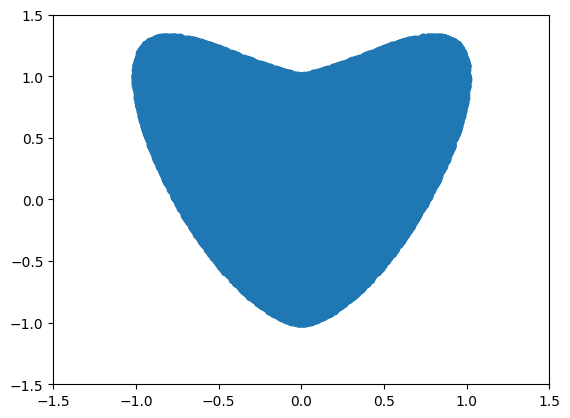

In [16]:
N = 100_000
aprox, points = area(N)
print(f'Area aproximada: {aprox}')

xs = [ x for x, y in points ]
ys = [ y for x, y in points ]

plt.plot(xs,ys, 'o')

plt.xticks(np.arange(-1.5,2,0.5))
plt.yticks(np.arange(-1.5,2,0.5))
plt.show()